# Figure 1

In [1]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating code

In [3]:
# Cumulative probability between two points when payments are exponentially distributed with mean 1
def I(x,y):
    if x >= 0:
        return np.exp(-x) - np.exp(-y)
    elif y <= 0:
        return 0
    else:
        return 1 - np.exp(-y)

params = GeneralMethod.PaymentParams(
    l_A = 0, 
    l_B = 20, 
    C = 1.0, 
    D = 2.0, 
    alpha = 1 / (1 + 0.02), 
    n = 20, 
    I = I  # The function I defined above
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params)
print("Optimal cost starting at zero with l_A=0 and l_B=20:", optimal_cost_vector[0])

Optimal cost starting at zero with l_A=0 and l_B=20: 4.682719652276495


In [4]:
# We know V_n(0, 20, params) = 0 + 20 + 4.682719652276495 < 25
GeneralMethod.multi_level_search(params, 5, 25, 0.5, 5, unidirectional=True, symmetric=False)

Starting coarse search with step size: 5, l_max: 25
Coarse search result: l_A = 0, l_B = 10, V = 20.424404868199233
Starting fine search with step size: 0.5 around the coarse minimum


(0, 10.5, 20.39795225652022)

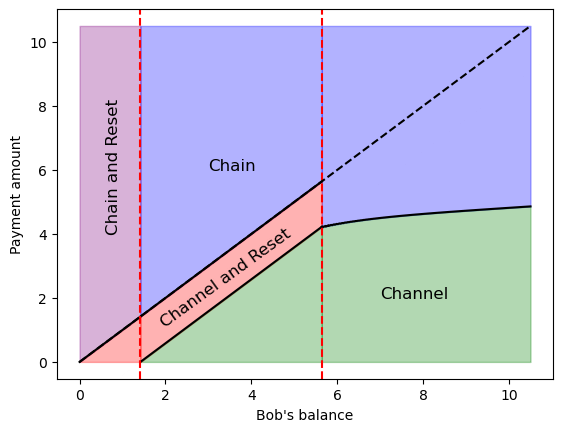

In [11]:
params.l_A = 0 # optimal l_A 
params.l_B = 10.5 # optimal l_B  

optimal_cost_vector = GeneralMethod.T_n(params) # Compute the corresponding optimal cost vector

reverse_optimal_cost_vector = optimal_cost_vector[::-1]

plt.text(7, 2, 'Channel', fontsize=12, color='black')
plt.text(3, 6, 'Chain', fontsize=12, color='black')
plt.text(3.4, 1, 'Channel and Reset', fontsize=12, color='black', rotation=36, va='bottom', ha='center')
plt.text(0.8, 4, 'Chain and Reset', fontsize=12, color='black', rotation='vertical', va='bottom', ha='center')
GeneralMethod.Optimal_Policy(reverse_optimal_cost_vector, 5, params, unidirectional=True)